In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
print(df.shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
num_cols = ['price', 'area']
cat_num_cols = [ 'bedrooms', 'bathrooms', 'stories', 'parking']
yes_no_cols = ['mainroad', 'guestroom' , 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
cat_col = ['furnishingstatus']

In [7]:
for col in yes_no_cols:
    df[col] = df[col].map({'yes' : 1, 'no':0})
    print(df[col].value_counts())

mainroad
1    468
0     77
Name: count, dtype: int64
guestroom
0    448
1     97
Name: count, dtype: int64
basement
0    354
1    191
Name: count, dtype: int64
hotwaterheating
0    520
1     25
Name: count, dtype: int64
airconditioning
0    373
1    172
Name: count, dtype: int64
prefarea
0    417
1    128
Name: count, dtype: int64


In [8]:
dummies = pd.get_dummies(df['furnishingstatus'], dtype=int, drop_first = True)
df = pd.concat([dummies, df], axis = 1)
df.drop(['furnishingstatus'], inplace=True, axis=1)

In [9]:
df.describe()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,545.000000,545.000000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.416514,0.326606,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,0.493434,0.469402,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,0.000000,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)
print(df_train.shape, df_test.shape, df.shape)

(381, 14) (164, 14) (545, 14)


In [13]:
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

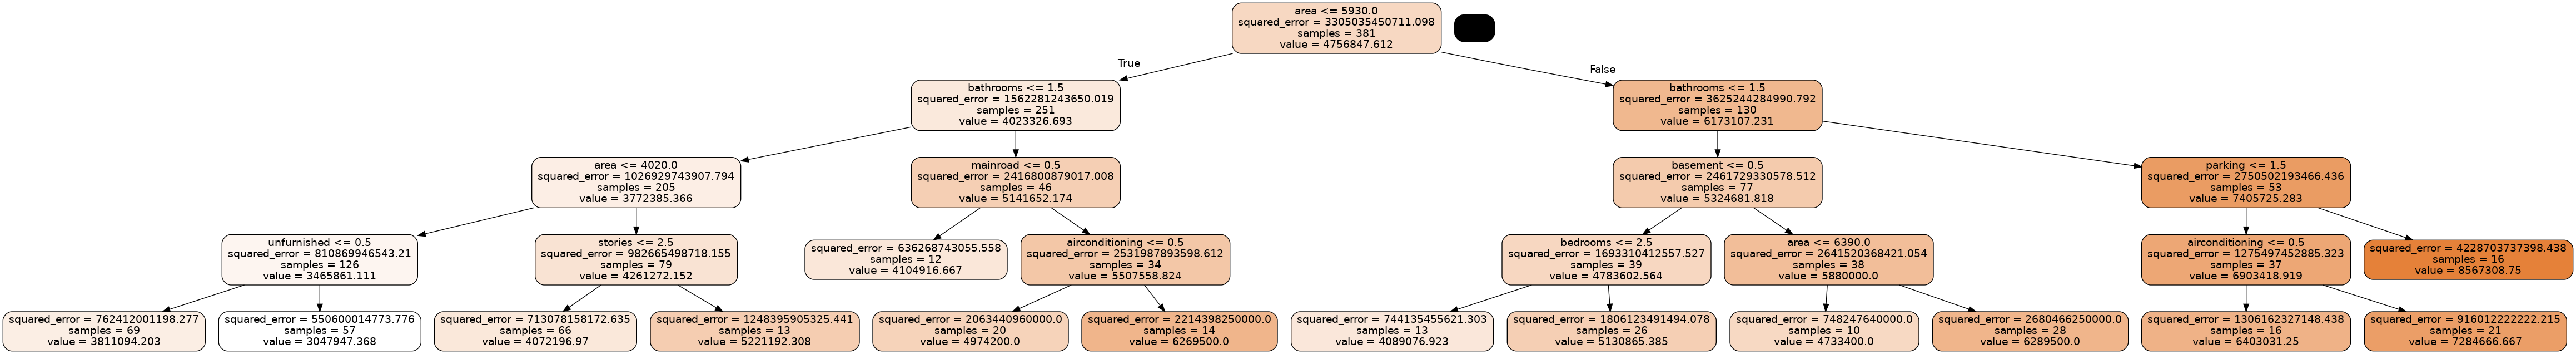

In [15]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


0.6234560022579934


<Axes: xlabel='price', ylabel='Density'>

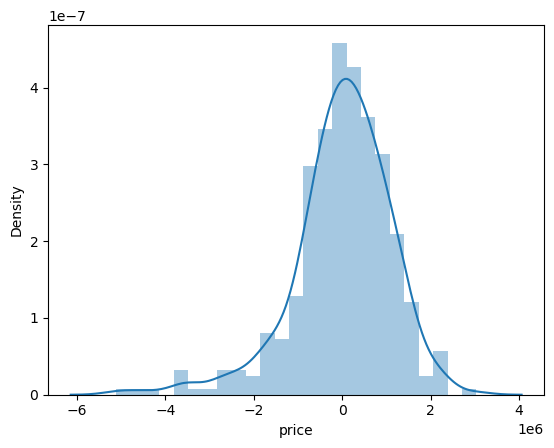

In [16]:
y_train_pred = dt.predict(X_train)
res = y_train_pred - y_train
print(r2_score(y_train, y_train_pred))
sns.distplot(res)

Text(0, 0.5, 'y_train_pred')

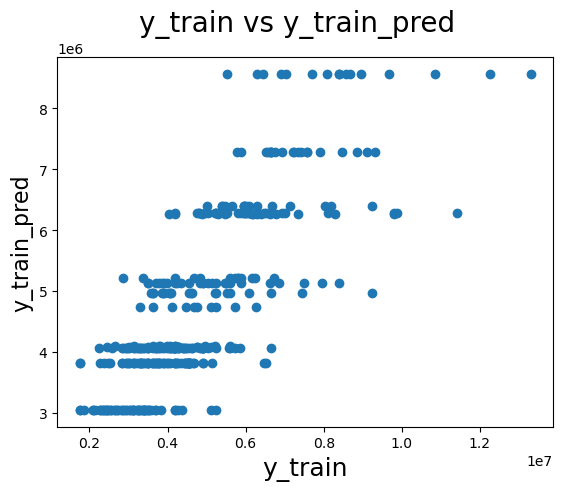

In [17]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)    

0.5289772624972268


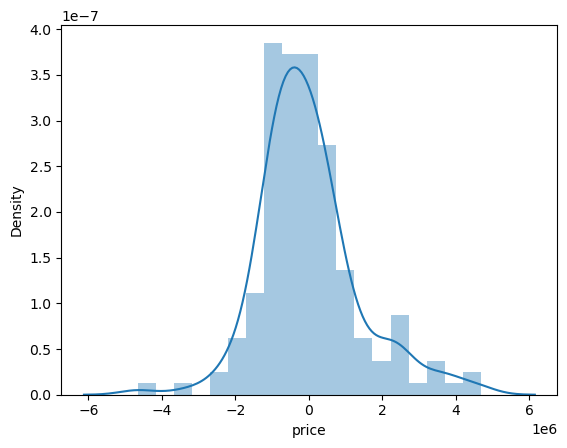

In [18]:
y_test_pred = dt.predict(X_test)
res =  y_test - y_test_pred
sns.distplot(res)
print(r2_score(y_test, y_test_pred))

Text(0, 0.5, 'y_pred')

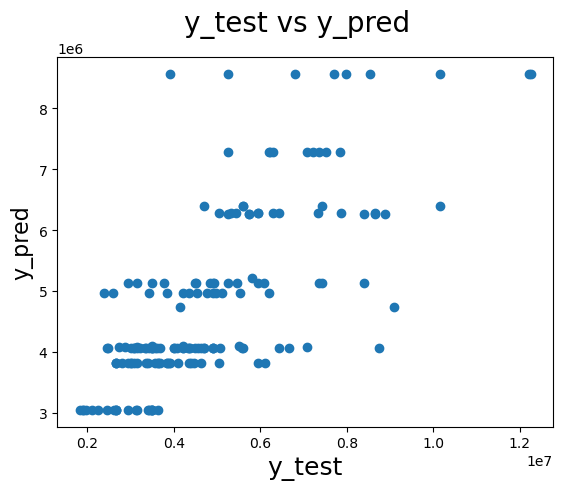

In [19]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [20]:
from sklearn.model_selection import GridSearchCV

In [27]:
dt_cv = DecisionTreeRegressor(random_state=42)
params = {
     'max_depth' : [3,5,7,9,11],
    'min_samples_leaf' : [3,5,10,20,50,100,200]
}
grid_search = GridSearchCV(estimator=dt_cv, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=4, verbose=1,)

In [28]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 35 candidates, totalling 140 fits
CPU times: user 453 ms, sys: 0 ns, total: 453 ms
Wall time: 776 ms


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019875,0.019905,0.006760,0.007499,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",-1.536898e+12,-1.350373e+12,-1.922011e+12,-2.633651e+12,-1.860733e+12,4.915521e+11,15
1,0.005306,0.004693,0.002971,0.002449,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",-1.536898e+12,-1.350373e+12,-1.922011e+12,-2.633651e+12,-1.860733e+12,4.915521e+11,15
2,0.005069,0.001001,0.001848,0.000817,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",-1.507387e+12,-1.307419e+12,-1.922011e+12,-2.633651e+12,-1.842617e+12,5.076549e+11,13
3,0.008363,0.008344,0.002640,0.001214,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",-1.546089e+12,-1.379379e+12,-1.669731e+12,-2.722280e+12,-1.829370e+12,5.257170e+11,10
4,0.003197,0.001043,0.001256,0.000242,3,50,"{'max_depth': 3, 'min_samples_leaf': 50}",-2.076243e+12,-2.140140e+12,-2.066901e+12,-3.301991e+12,-2.396319e+12,5.236493e+11,26


In [30]:
 grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

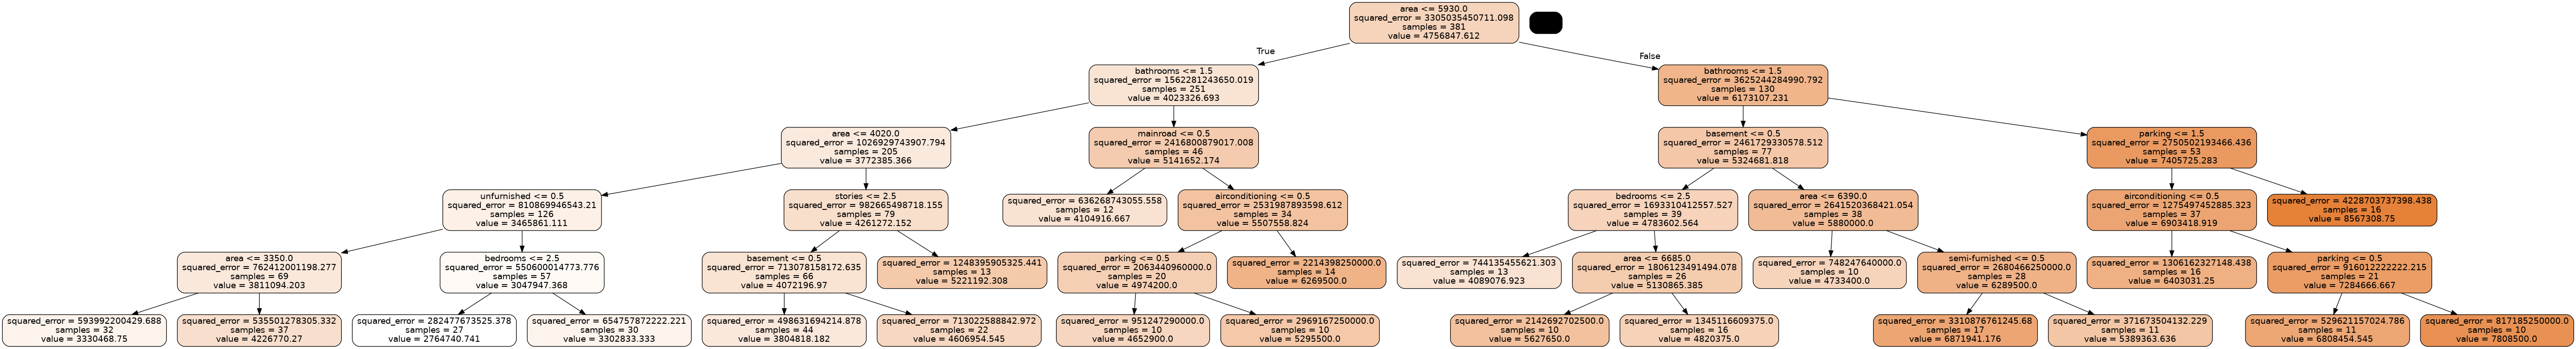

In [31]:
best =  grid_search.best_estimator_
dot_data = StringIO()

export_graphviz(best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())